# Polynomial regression 

The example belows uses a temperature-energy dataset in order to illustrate how to perform a non linear regression.

Workflow:
1. Preparation
    - Extract the dataset from the _power_demand_vs_temperature.csv_ 
    - Explore the dataset and check for missing values
    - Plot the distribution
    - Divide the dataset into train and test 
    - Create an evaluation function
2. First experiment
    - Create a linear model 
    - Train the model on X_train and y_train
    - Evaluate the model on X_test and y_test
    - Visualize the prediction of the model
3. Second experiment
    - Create a polynomial regression model with degree 2
    - Train the model on X_train and y_train
    - Evaluate the model on X_test and y_test
    - Visualize the prediction of the model
4. Third experiment
    - repeat the steps done in the second experiment but with degree 3
5. Third experiment
    - repeat the steps done in the second experiment but with degree 4
6. Compare the evaluation of each model


In [18]:
# Code source: Filippo Orazi 
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

random_state = 42 # this will be used to guarantee the repeatability of the experiment

## Dataset preparation

### Load the dataset from a `.csv` file
This cell allows full compatibility between execution in Google Colab and in local


In [1]:
try:
  import google.colab.files
  IN_COLAB = True
except:
  IN_COLAB = False
# from google.colab import files
if IN_COLAB:
    uploaded = files.upload()


The file must be available in the same directory, or uploaded in the Colab environment in the execution of the previous cell


In [5]:
df = pd.read_csv("power_demand_vs_temperature.csv")
df.head()

,date,demand,temp
0,2015-01-01,1.736065,1.7
1,2015-01-02,1.831672,2.2
2,2015-01-03,1.714934,14.4
3,2015-01-04,1.628577,15.6
4,2015-01-05,2.045394,0.0


Set the date column as index

In [7]:
df = df.set_index("date")
df

,demand,temp
date,,
2015-01-01,1.736065,1.7
2015-01-02,1.831672,2.2
2015-01-03,1.714934,14.4
2015-01-04,1.628577,15.6
2015-01-05,2.045394,0.0
...,...,...
2017-12-27,1.983683,-9.4
2017-12-28,2.001531,-10.0
2017-12-29,1.940514,-7.8


### Explore the dataset and check for missing values


In [8]:
df.describe()

,demand,temp
count,1096.000000,1096.000000
mean,1.831796,16.927737
std,0.329434,10.791581
min,1.316033,-15.000000
25%,1.581654,8.900000
50%,1.731479,18.900000
75%,2.024869,26.100000
max,2.804025,33.900000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1096 entries, 2015-01-01 to 2017-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   demand  1096 non-null   float64
 1   temp    1096 non-null   float64
dtypes: float64(2)
memory usage: 25.7+ KB


### Create X and y 

In [15]:
X = df.drop("demand", axis=1)
Y = df["demand"]

print("X has shape: ", X.shape)
print("Y has shape: ", Y.shape)

X has shape:  (1096, 1)
Y has shape:  (1096,)


### Plot the distribution



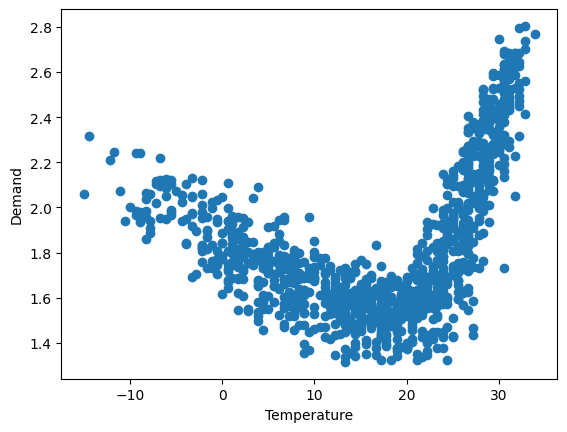

In [16]:
plt.ylabel("Demand")
plt.xlabel("Temperature")
plt.scatter(X, Y)

### Divide the dataset in train and test splits

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [29]:
y_train.shape

(876,)

### Create an evaluation function to compute, print and return the metrics: rmse r2 f-statistic and p-value

In [35]:
# Computation of F-statistic and p-value for the regression
# http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm

def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-scipy.stats.f.cdf(f, nun, dun)
    return f, p_value

def stats(y, y_pred):
    rmse = np.sqrt(np.average((y-y_pred)**2))
    average = np.average(y)
    ssr = np.sum((y-y_pred)**2)
    sst = np.sum((y-average)**2)
    r2 = 1 - ssr/sst
    f, p_value = f_test(y, y_pred)
    print("RMSE: ", rmse)
    print("R2: ", r2)
    print("f-statistic: ", f)
    print("p-value: ", p_value)
    return rmse, r2, f, p_value

## First experiment
Create a linear model 

Train the model on X_train and y_train 

Evaluate the model on X_test and y_test


In [37]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
stats(y_test, y_pred);

RMSE:  0.31141464165189164
R2:  0.16373081219100827
f-statistic:  8.757728529883497
p-value:  1.1102230246251565e-16


#### Visualize the prediction of the model 

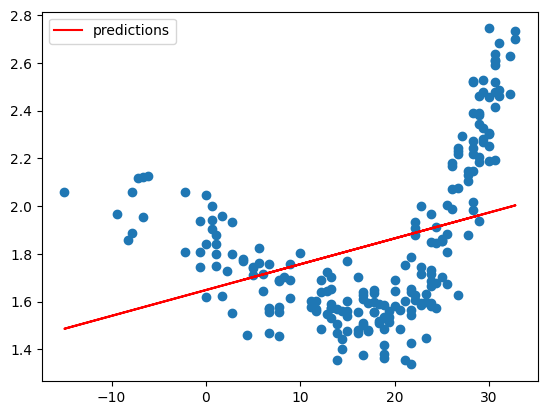

In [41]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, label="predictions", color="red")
plt.legend()


## Second experiment - Polynomial regression
We can clearly see that the linear regression model cannot really approximate the data distribution.

We can now try with a non linear regression model:
1. Use the sklearn fucntion _PolynomialFeature_ to create a new array of features. Set _degree=2_ and _include_bias=False_
2. Train a Linear regression model with the new features
3. Evaluate the model 
4. Visualize the predicted values of the model

#### Polynomial degree = 2

In [83]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
model_poly = linear_model.LinearRegression()

/home/elements72/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


In [84]:
model_poly.fit(x_train_poly, y_train)
y_pred_poly = model_poly.predict(x_test_poly)
stats(y_test, y_pred);

RMSE:  0.31141464165189164
R2:  0.16373081219100827
f-statistic:  8.757728529883497
p-value:  1.1102230246251565e-16


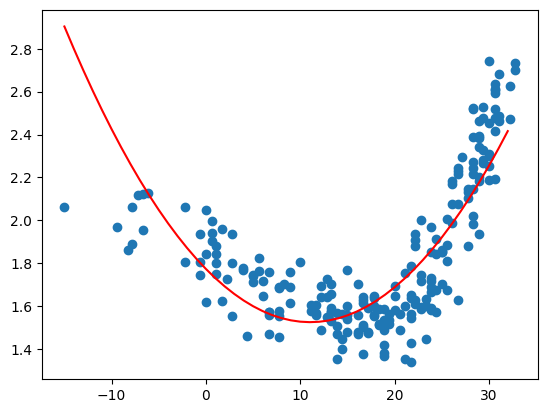

In [88]:
plt.scatter(x_test, y_test)
x_plot = np.arange(min(x_test.temp), max(x_test.temp)).reshape((-1,1)) 
y_plot = model_poly.predict(poly.transform(x_plot))
plt.plot(x_plot, y_plot, c="red")

## Third experiment

#### Polynomial degree = 3

In [98]:
poly = PolynomialFeatures(degree=3, include_bias=False)
x_train_poly = poly.fit_transform(x_train.values)
x_test_poly = poly.transform(x_test.values)
model_poly = linear_model.LinearRegression()

In [99]:
model_poly.fit(x_train_poly, y_train)
y_pred_poly = model_poly.predict(x_test_poly)
stats(y_test, y_pred);

RMSE:  0.31141464165189164
R2:  0.16373081219100827
f-statistic:  8.757728529883497
p-value:  1.1102230246251565e-16


In [100]:
model_poly.fit(x_train_poly, y_train)
y_pred_poly = model_poly.predict(x_test_poly)
stats(y_test, y_pred);

RMSE:  0.31141464165189164
R2:  0.16373081219100827
f-statistic:  8.757728529883497
p-value:  1.1102230246251565e-16


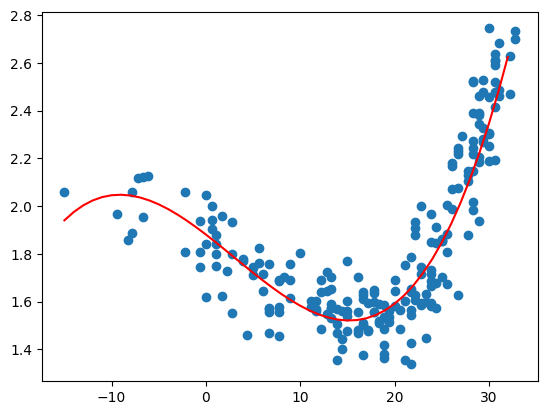

In [101]:
plt.scatter(x_test, y_test)
x_plot = np.arange(min(x_test.temp), max(x_test.temp)).reshape((-1, 1))
y_plot = model_poly.predict(poly.transform(x_plot))
plt.plot(x_plot, y_plot, c="red")


## Fourth experiment
### Polynomial degree = 4

In [19]:
poly = PolynomialFeatures(degree=4, include_bias=False)
x_train_poly = poly.fit_transform(x_train.values)
x_test_poly = poly.transform(x_test.values)
model_poly = linear_model.LinearRegression()

Polynomial degree = 4


LinearRegression()

In [103]:
model_poly.fit(x_train_poly, y_train)
y_pred_poly = model_poly.predict(x_test_poly)
stats(y_test, y_pred);

RMSE:  0.31141464165189164
R2:  0.16373081219100827
f-statistic:  8.757728529883497
p-value:  1.1102230246251565e-16


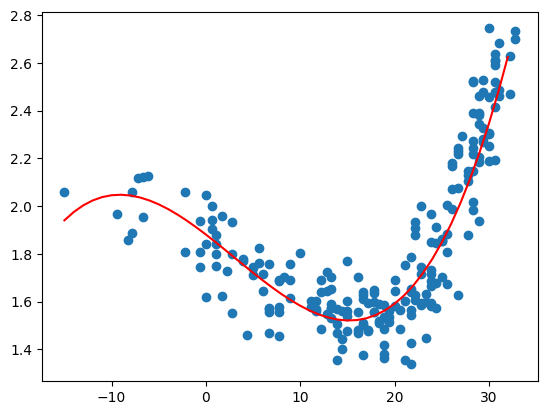

In [104]:
plt.scatter(x_test, y_test)
x_plot = np.arange(min(x_test.temp), max(x_test.temp)).reshape((-1, 1))
y_plot = model_poly.predict(poly.transform(x_plot))
plt.plot(x_plot, y_plot, c="red")


## Compare the performance of the four models

In [105]:
performance = {"linear ": [*lin],
               "polynomial d = 2": [*pol],
               "polynomial d = 3": [*pol3],
               "polynomial d = 4": [*pol4]}
res = pd.DataFrame(performance, index=['rmse', 'r2', 'f-statistic', 'p-value'])
res


NameError: name 'lin' is not defined